In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop(columns=['PassengerId','Name', 'Ticket' ,'Cabin'],inplace=True)

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


Survival rate based on age

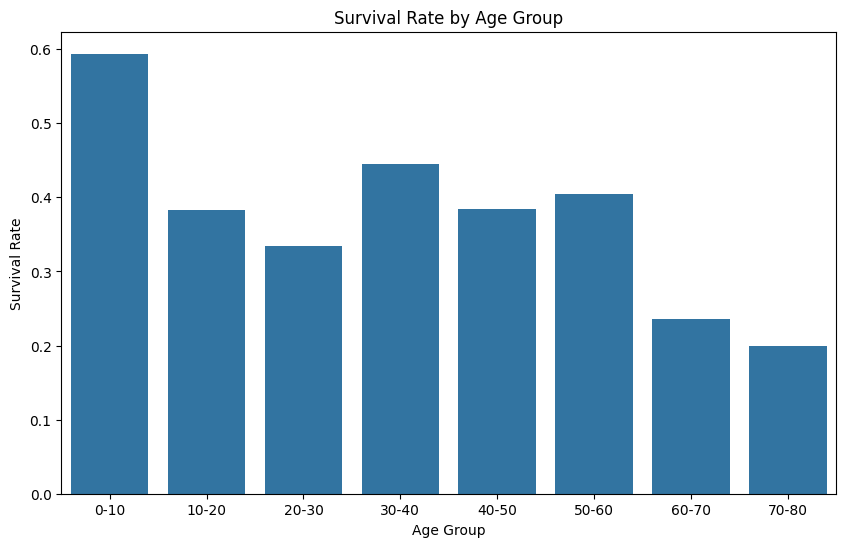

In [ ]:
# Create age bins (e.g., 0-10, 10-20, etc.)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Plot the survival rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


Survival rate based on gender

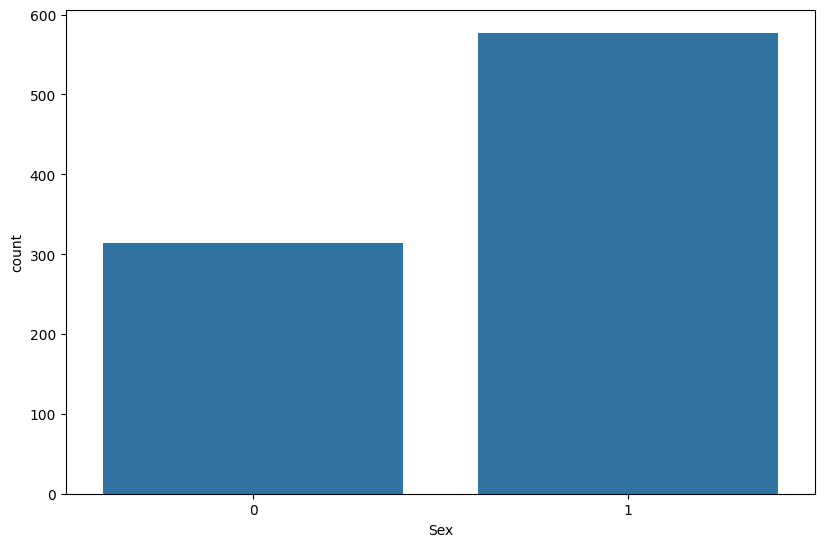

In [ ]:
plt.figure(figsize=(16, 16))
plt.subplot(3,2,2)
sns.countplot(x='Sex', data=df)
plt.tight_layout()
plt.show()

Survival rate based on status

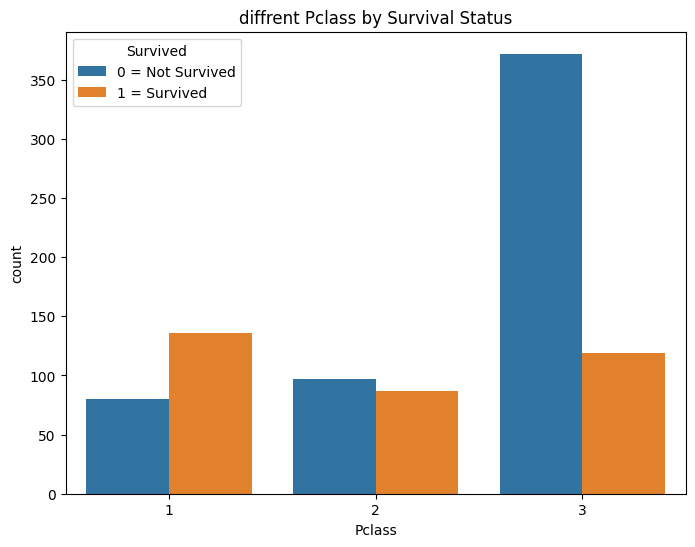

In [ ]:
# Bar plot of survival rate by passenger class (Pclass)
plt.figure(figsize=(8, 6))


sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()


Survival rate based on Fare

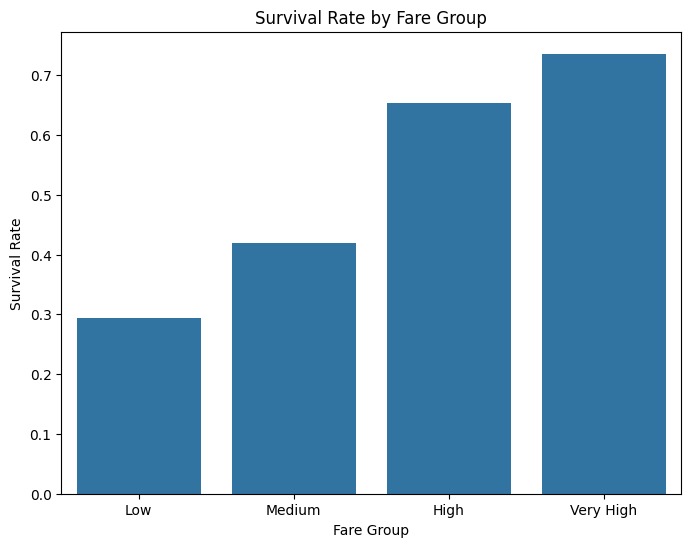

In [ ]:
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 25, 50, 100, 600], labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(8, 6))
sns.barplot(x='FareGroup', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()


Survival rate based on Embarked

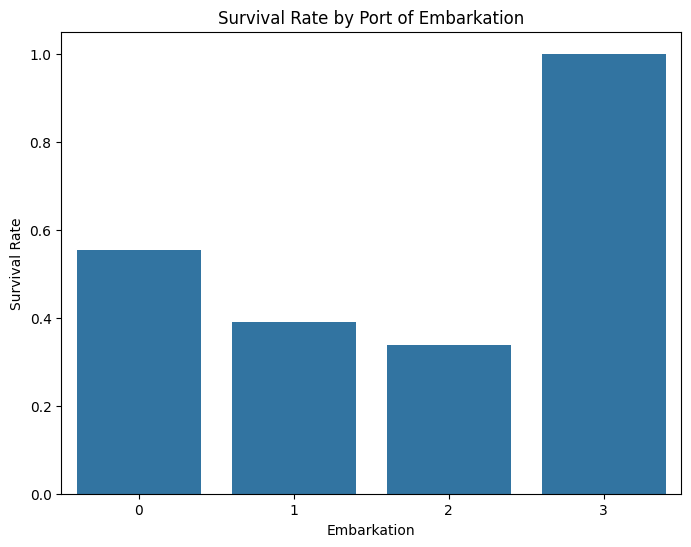

In [ ]:
# Bar plot of survival rate by embarkation port
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Embarkation')
plt.ylabel('Survival Rate')
plt.show()


Applying ML models

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    int64   
 3   Age        891 non-null    float64 
 4   SibSp      891 non-null    int64   
 5   Parch      891 non-null    int64   
 6   Fare       891 non-null    float64 
 7   Embarked   891 non-null    int64   
 8   AgeGroup   891 non-null    category
 9   FareGroup  876 non-null    category
dtypes: category(2), float64(2), int64(6)
memory usage: 58.1 KB


In [ ]:
label_encoder = LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])

In [ ]:
label_encoder = LabelEncoder()
df['Fare'] = label_encoder.fit_transform(df['Fare'])

In [ ]:
label_encoder = LabelEncoder()
df['FareGroup'] = label_encoder.fit_transform(df['FareGroup'])

In [ ]:
label_encoder = LabelEncoder()
df['AgeGroup'] = label_encoder.fit_transform(df['AgeGroup'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int64
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int64
 7   Embarked   891 non-null    int64
 8   AgeGroup   891 non-null    int64
 9   FareGroup  891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [ ]:
## spliting data into test and train
x = df.drop(['Survived'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred=m1.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

Applying Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m2 = RandomForestClassifier()
m2.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
y_pred2=m2.predict(X_test_scaled)
accuracy_score(y_test,y_pred2)

0.7932960893854749

Applying SVC

In [ ]:
from sklearn.svm import SVC
m3 = SVC()
m3.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred3=m3.predict(X_test_scaled)
accuracy_score(y_test,y_pred3)

0.7988826815642458

Applying XGBoost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
m4=XGBClassifier()
m4.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred4=m4.predict(X_test_scaled)
accuracy_score(y_test,y_pred4)

0.8044692737430168